In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [2]:
data = [(1,1,4), (1,0,2), (1,2,5), (1,3,5), (1,3,4), (-1,4,0), (-1,5,1), (-1,5,2), (-1,6,1), (-1,6,4)]

df = pd.DataFrame(data)
df.columns = ['group', 'x', 'y']
df.head(n=5)

,group,x,y
0,1,1,4
1,1,0,2
2,1,2,5
3,1,3,5
4,1,3,4


In [3]:
N = len(data)
a1 = sympy.symbols('a') 

def calculateAlphaVector(data):
    
    alphas = []
    i = 0
    j = 0
    
    while i < len(data):
        while j < len(data):
            alphas.append((data[i][0] * data[j][0]) * ((data[i][1] * data[j][1]) 
                                                              + (data[i][2] * data[j][2])))
            j += 1
        j = 0
        i += 1

    total_of_alphas = (sum(alphas) * 0.5) * 2

    equation = sympy.Eq(N - total_of_alphas * a1, 0)
    alpha = sympy.solve(equation, a1)[0]
    
    print(f"Solution for a1: {alpha}")

    return alpha

def calculateWeightVector(data, alpha):
    
    x = [point[0] * point[1] for point in data]
    y = [point[0] * point[2] for point in data]

    weight_vector = ((sum(x) * alpha), (sum(y) * alpha))

    print(f'Weight vector is: {weight_vector}')
    
    return weight_vector

def calculateBias(data, weight_vector):
    
    positives = [(point[1] * weight_vector[0]) + (point[2] * weight_vector[1])
                 for point in data if point[0] == 1]
    negatives = [(point[1] * weight_vector[0]) + (point[2] * weight_vector[1])
                 for point in data if point[0] == -1]
 
    bias = (min(positives) + max(negatives)) * 0.5

    print(f'Bias value is: {bias}')

    return bias

In [4]:
alpha = calculateAlphaVector(data)
weight_vector = calculateWeightVector(data, alpha)
bias = calculateBias(data, weight_vector)

print(f'\nf(x)= {round(weight_vector[0],2)}*x1 {round(weight_vector[1],2)}*x2 {round(bias,2)}')

Solution for a1: 0.0230946882217090
Weight vector is: (-0.392609699769053, 0.277136258660508)
Bias value is: -0.658198614318707

f(x)= -0.39*x1 0.28*x2 -0.66


In [5]:
x1, x2 = sympy.symbols('x1 x2')

def simplify(weight_vector, bias):
    expr = weight_vector[0] * x1 + weight_vector[1] * x2 - bias
    new_expr = sympy.simplify(expr)
    return new_expr

In [6]:
expr = simplify(weight_vector, bias)

In [7]:
value = expr.subs({x1: 3, x2: 2})
print(value)


0.0346420323325636


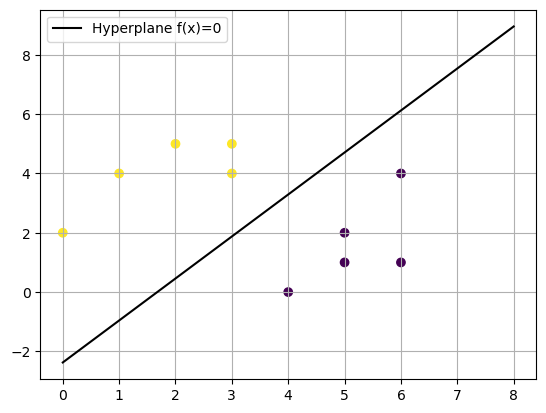

In [8]:
x1_vals = np.linspace(0, 8, 100)

x2_vals = -(weight_vector[0] / weight_vector[1]) * x1_vals + (bias / weight_vector[1])

plt.plot(x1_vals, x2_vals, 'k-', label='Hyperplane f(x)=0')
plt.scatter(x=df['x'], y=df['y'], c=df['group'])
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def predict(unseen_data, formular, df):
    for i in unseen_data:
        result = formular.subs({x1:i[0], x2:i[1]})
        print(result)
        if result > 0:
            new_row = pd.DataFrame([{'group':1, 'x':i[0], 'y':i[1]}])
        elif result < 0:
            new_row = pd.DataFrame([{'group':-1, 'x':i[0], 'y':i[1]}])
        else: 
            new_row = pd.DataFrame([{'group':0, 'x':i[0], 'y':i[1]}])
        df = pd.concat([df, new_row])
    return df

In [10]:
unseen_data = [(1,6),(4,4),(3,0),(8,2)]
df = predict(unseen_data, expr, df)

1.92840646651270
0.196304849884527
-0.519630484988453
-1.92840646651270


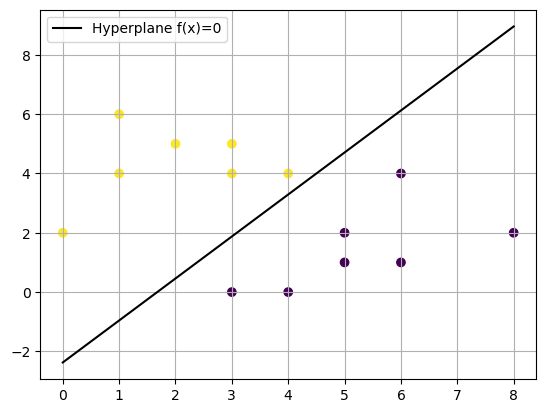

In [11]:
x1_vals = np.linspace(0, 8, 100)

x2_vals = -(weight_vector[0] / weight_vector[1]) * x1_vals + (bias / weight_vector[1])

plt.plot(x1_vals, x2_vals, 'k-', label='Hyperplane f(x)=0')
plt.scatter(x=df['x'], y=df['y'], c=df['group'])
plt.legend()
plt.grid(True)
plt.show()